<a href="https://colab.research.google.com/github/Dipto1971/Retail-Store-Inventory-Forecasting/blob/main/Thesis_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from scipy.stats import shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Dataset from Kaggle

In [50]:
 # Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "retail_store_inventory.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "anirudhchauhan/retail-store-inventory-forecasting-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/5w/zh343ymj39b6pnrjwkkqpb9w0000gn/T/ipykernel_44532/3280347421.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:          Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autu

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [52]:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min     

In [53]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

## Exploratory data analysis (EDA)

In [54]:
# ==============================
# Visualizations
# ==============================

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Distribution Plots for Numerical Columns


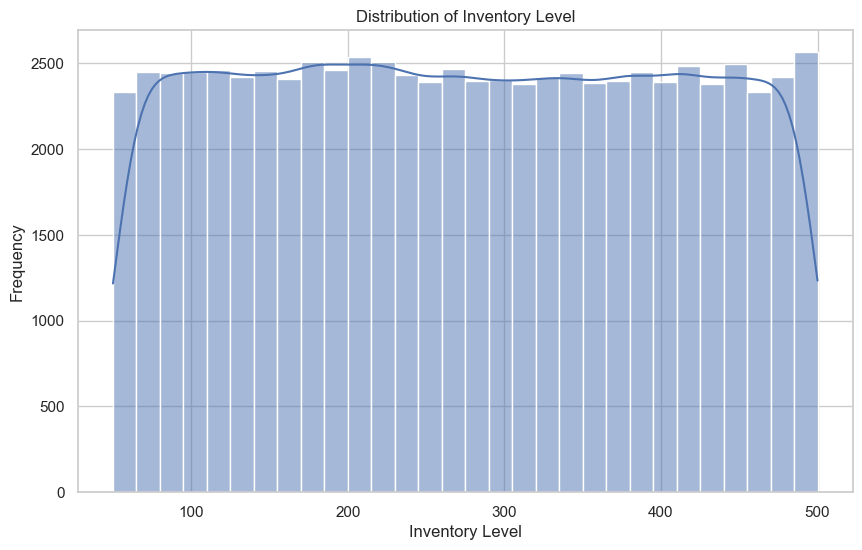

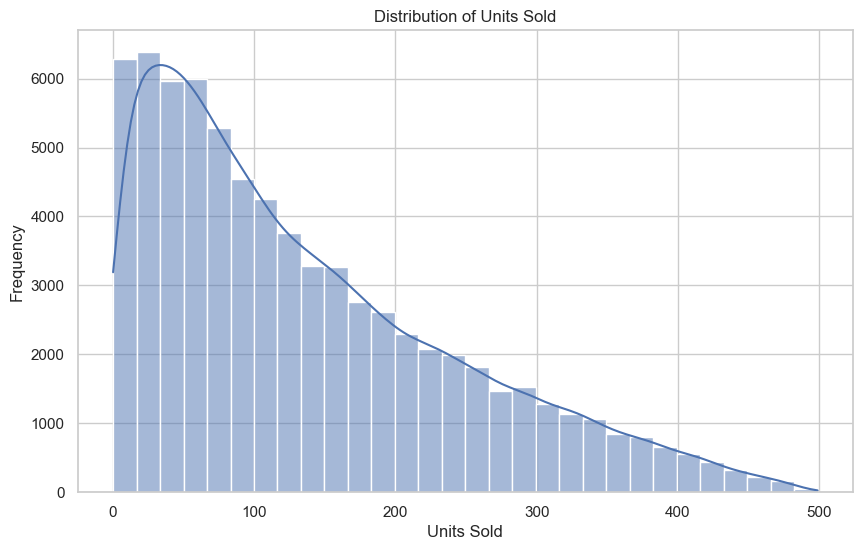

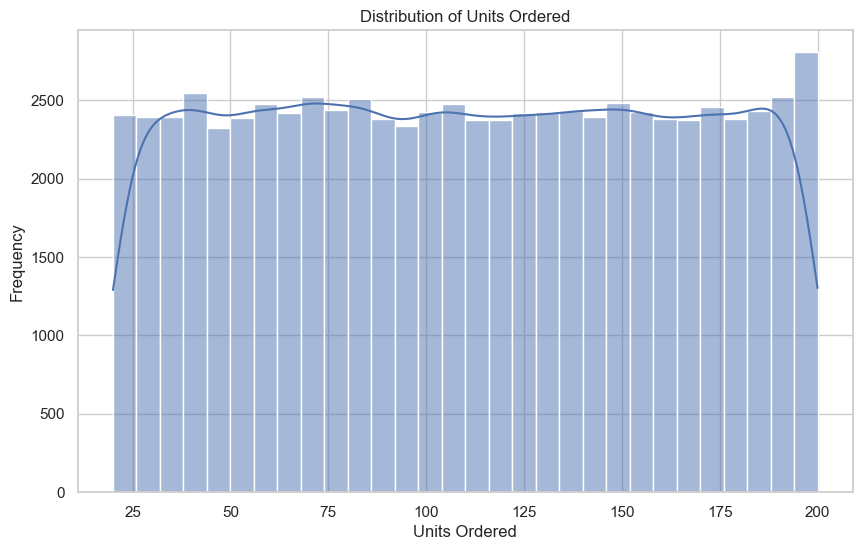

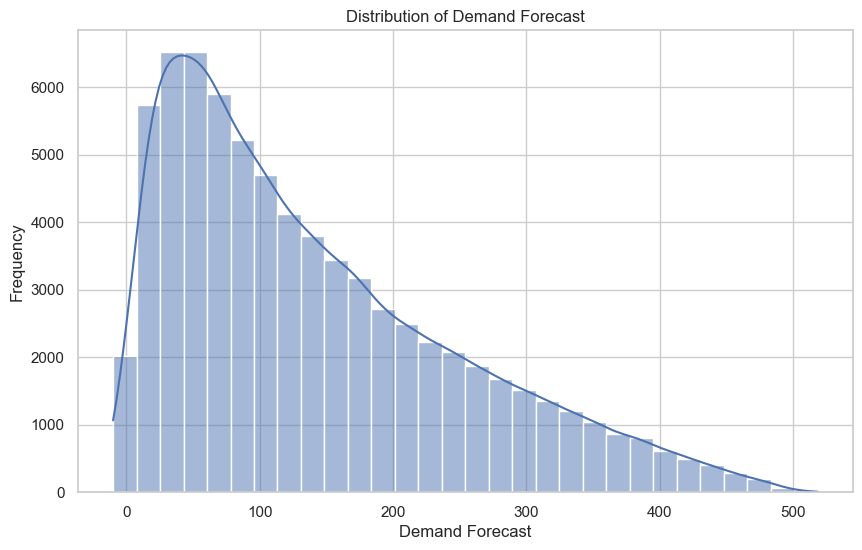

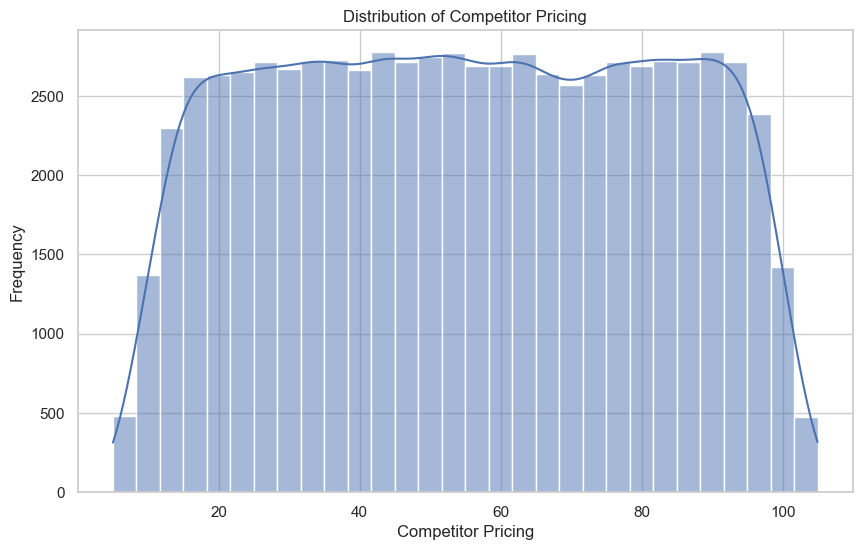

In [55]:
num_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Competitor Pricing']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Distribution Plots for Categorical Columns


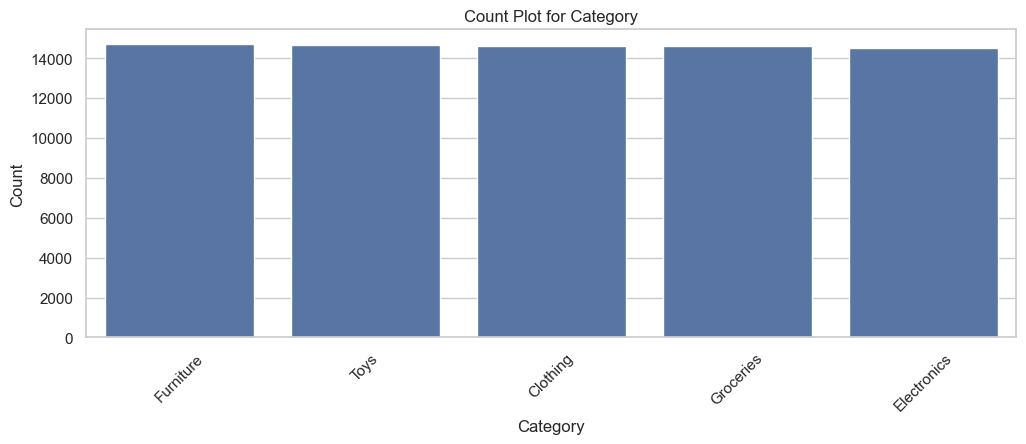

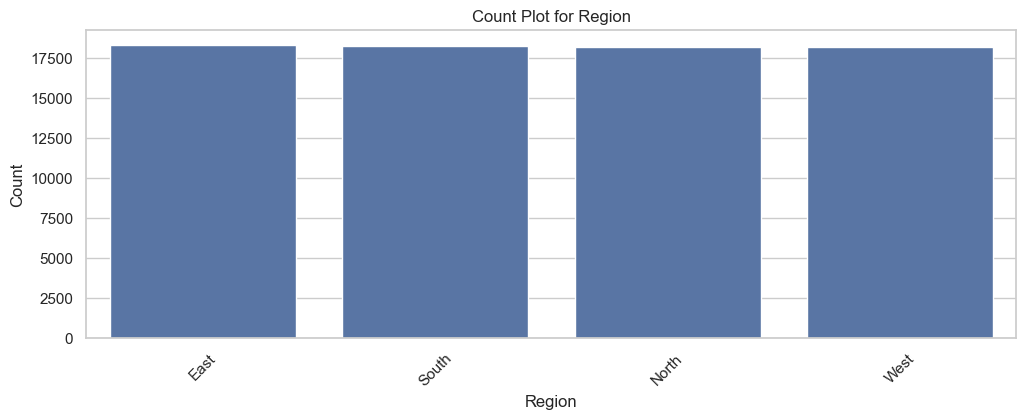

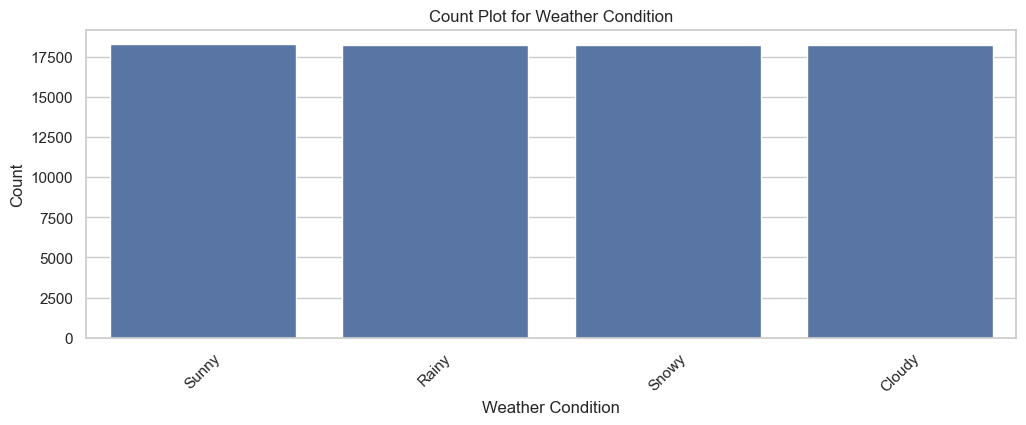

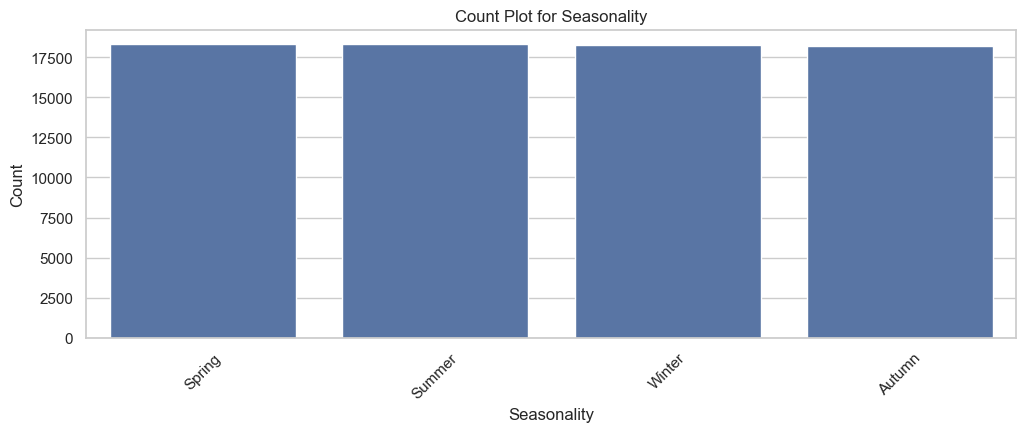

In [56]:
cat_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']

for col in cat_cols:
    plt.figure(figsize=(12, 4))
    order = df[col].value_counts().index  # sort by frequency
    sns.countplot(x=col, data=df, order=order)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Time Series Analysis: Daily Total Units Sold

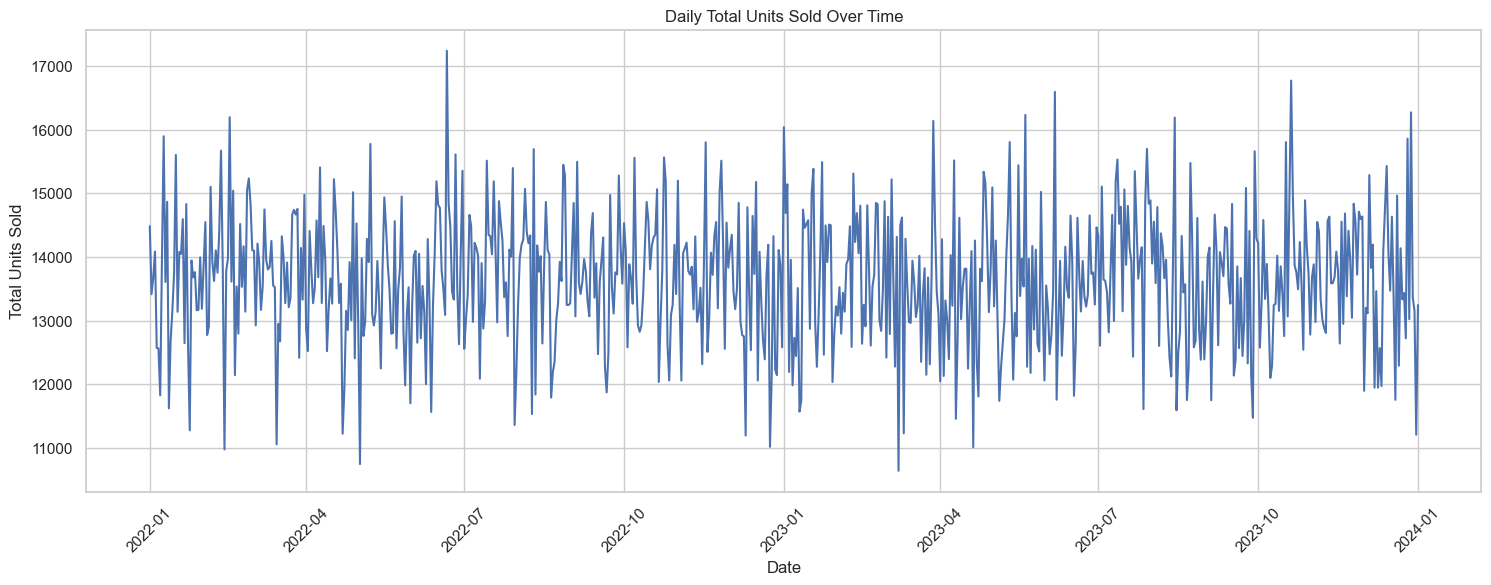

In [57]:
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Units Sold', data=daily_sales)
plt.title('Daily Total Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

# Correlation HeatMap

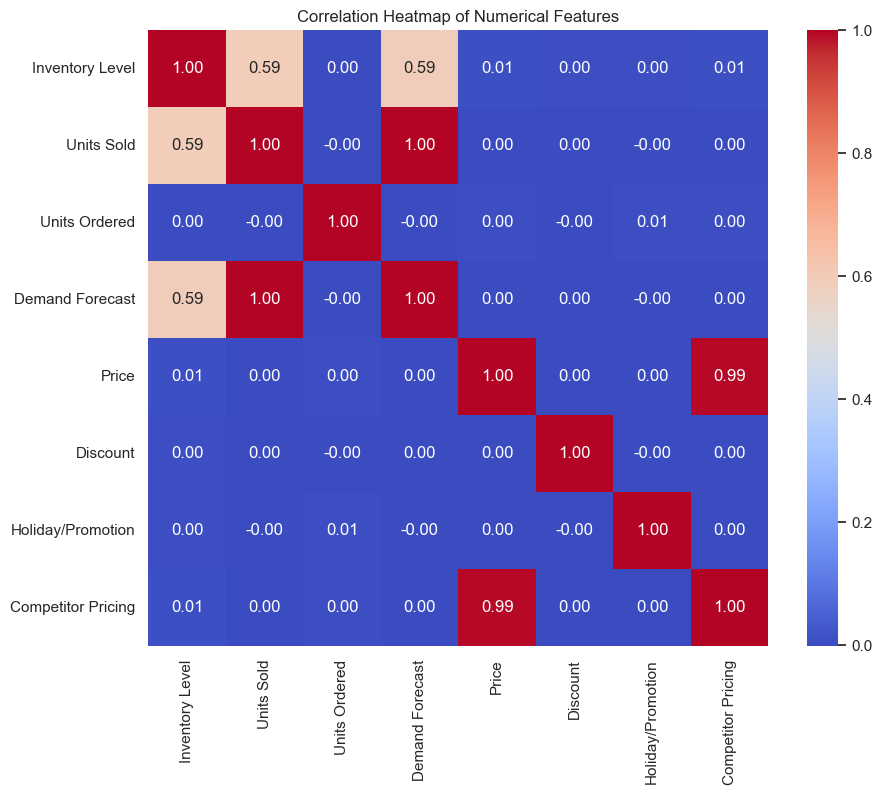

In [58]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Box Plot: Units Sold Distribution by Category

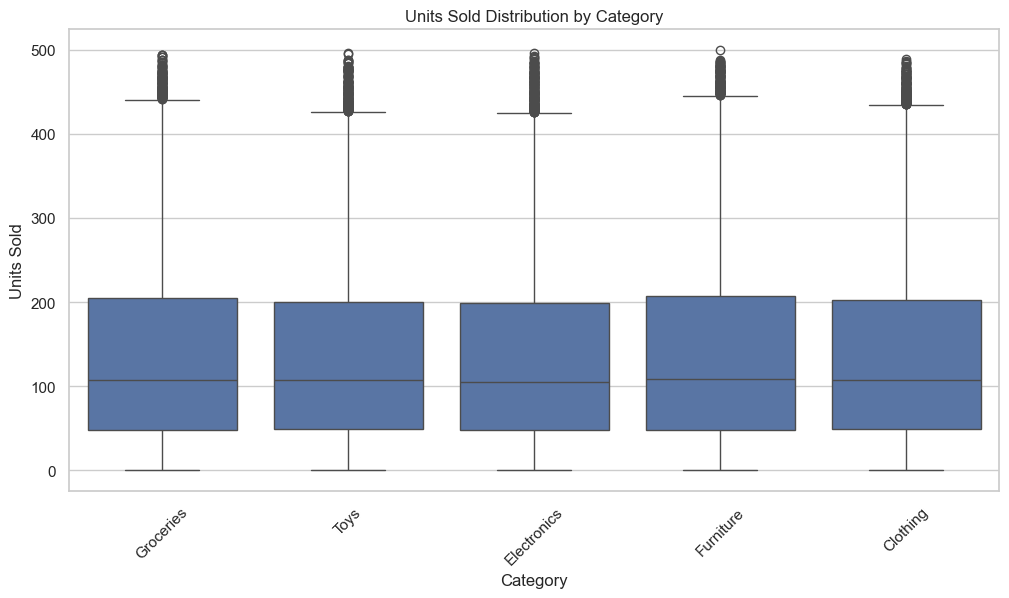

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Units Sold', data=df)
plt.title('Units Sold Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Trend

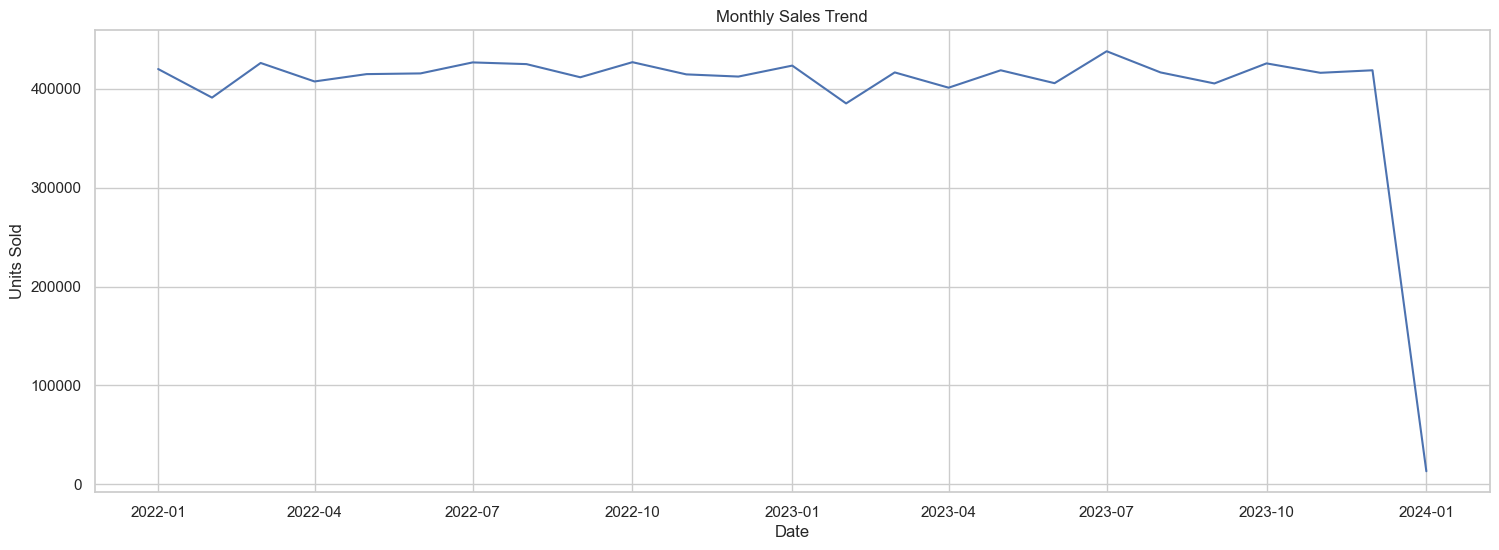

In [60]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units Sold'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
plt.figure(figsize=(18, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Units Sold'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

# Challenge 2: Optimize Inventory Levels
- Analyzing sales trends and minimizing stockouts while reducing overstock situation

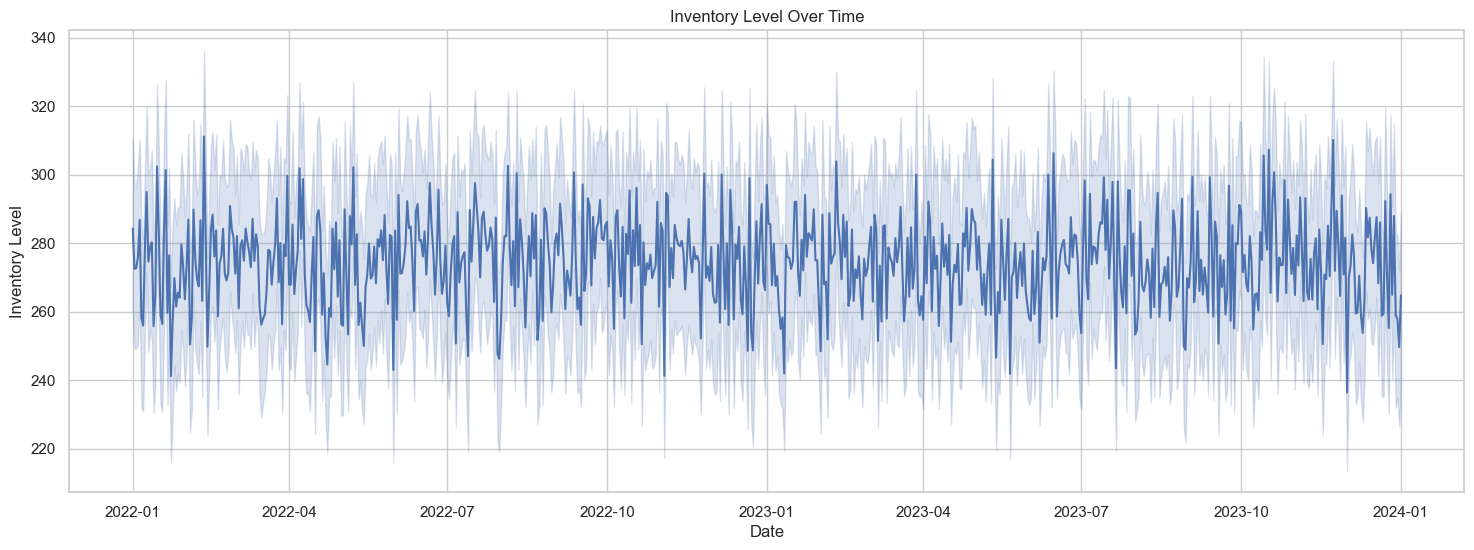

In [61]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Inventory Level', data=df)
plt.title('Inventory Level Over Time')
plt.show()

### Calculate stockout frequency

In [62]:
stockout_freq = (df['Inventory Level'] == 0).mean()
print(f"Stockout frequency: {stockout_freq:.2%}")

Stockout frequency: 0.00%


### Calculate overstock frequency

In [63]:
avg_daily_sales = df.groupby('Date')['Units Sold'].mean().mean()
overstock_freq = (df['Inventory Level'] > 2 * avg_daily_sales).mean()
print(f"Overstock frequency: {overstock_freq:.2%}")

Overstock frequency: 50.19%


# Feature Engineering
### Capturing temporal dependencies
- Short Term (Yesterday's Sale) -> Getting an immediate past perspective
- Weekly Trends -> To follow weekly pattern

#### Problem:
- Daily Sales can be erratic due to promotions or Random Fluctuations
#### Solutions:
- Rolling Means of: 7 days window, 14 days window

### Keeping day of week & month for cyclical pattern

In [64]:
# Sort the DataFrame by date and store/product ID to ensure correct lag and rolling calculations
df = df.sort_values(['Store ID', 'Product ID', 'Date'])

# Create lag features
for lag in [1, 7]:
    df[f'Sales_Lag_{lag}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(lag)

# Create rolling mean features
for window in [7, 14]:
    df[f'Sales_RollingMean_{window}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].transform(lambda x: x.rolling(window=window, min_periods=1).mean())

# Add day of week and month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Print the shape of the DataFrame after dropping NA values
print(f"Shape before dropping NA: {df.shape}")

# Handle missing values
df = df.dropna()

# Print the shape of the DataFrame after dropping NA values
print(f"Shape after dropping NA: {df.shape}")

# Check the created features
print(df[['Units Sold'] + [f'Sales_Lag_{lag}' for lag in [1, 7]] + [f'Sales_RollingMean_{window}' for window in [7, 14]] + ['DayOfWeek', 'Month']].head())

Shape before dropping NA: (73100, 21)
Shape after dropping NA: (72400, 21)
      Units Sold  Sales_Lag_1  Sales_Lag_7  Sales_RollingMean_7  \
700            2        107.0        127.0            62.428571   
800          350          2.0         81.0           100.857143   
900           36        350.0          5.0           105.285714   
1000          16         36.0         58.0            99.285714   
1100         104         16.0        147.0            93.142857   

      Sales_RollingMean_14  DayOfWeek  Month  
700              70.500000          5      1  
800             101.555556          6      1  
900              95.000000          0      1  
1000             87.818182          1      1  
1100             89.166667          2      1  


# Build, Train, & Evaluate Models

### Models
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

In [66]:
%pip install scikit-learn

import pandas as pd
import numpy as np

# For splitting the data and evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# For scaling (used by Linear Regression)
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 472.3 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
import pandas as pd
import numpy as np

# Splitting data and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Define features and target. (Ensure these columns exist in df.)
features = [
    'Inventory Level', 'Units Ordered', 'Demand Forecast', 'Price',
    'Discount', 'Competitor Pricing', 'Sales_Lag_1', 'Sales_Lag_7',
    'Sales_RollingMean_7', 'Sales_RollingMean_14', 'DayOfWeek', 'Month'
]
target = 'Units Sold'

# Create feature matrix X and target vector y
X = df[features]
y = df[target]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features for models that benefit from scaling (e.g., Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define our five models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Dictionary to store model results
results = {}

# Train and evaluate each model
for name, model in models.items():
    if name == 'Linear Regression':
        # Use scaled features for Linear Regression
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        # For tree-based methods, use unscaled features
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Print results for each model
for model_name, scores in results.items():
    print(f"{model_name}: MSE = {scores['MSE']:.3f}, MAE = {scores['MAE']:.3f}, RMSE = {scores['RMSE']:.3f}, R2 = {scores['R2']:.3f}")

# Determine the best scoring model based on RMSE (lower RMSE is better)
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nBest performing model: {best_model}")


Linear Regression: RMSE = 8.641, R2 = 0.994
Decision Tree: RMSE = 11.878, R2 = 0.988
Random Forest: RMSE = 8.568, R2 = 0.994
Gradient Boosting: RMSE = 8.477, R2 = 0.994
XGBoost: RMSE = 8.548, R2 = 0.994

Best performing model: Gradient Boosting


### Learning Curve for each Model

Plotting learning curve for Linear Regression...


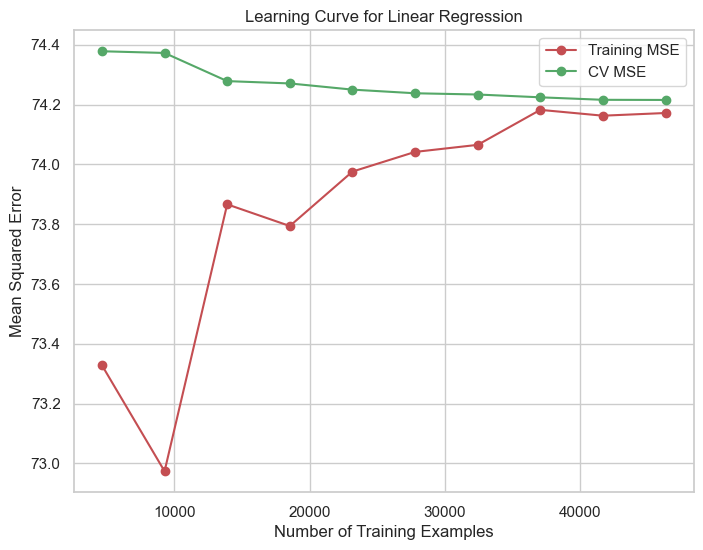

Plotting learning curve for Decision Tree...


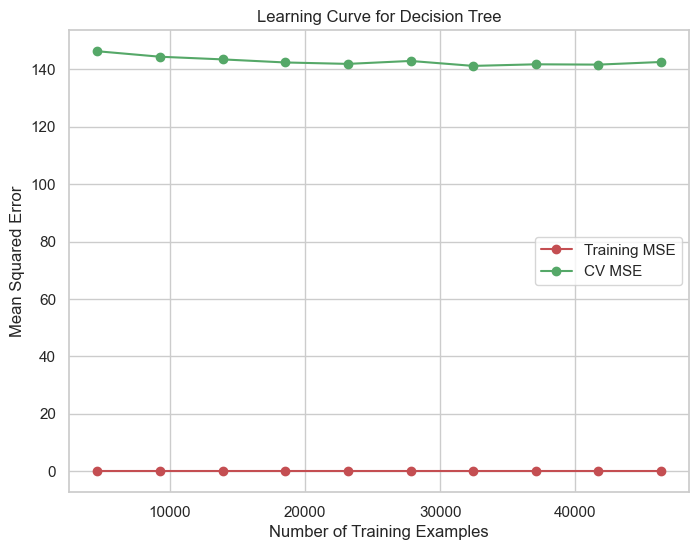

Plotting learning curve for Random Forest...


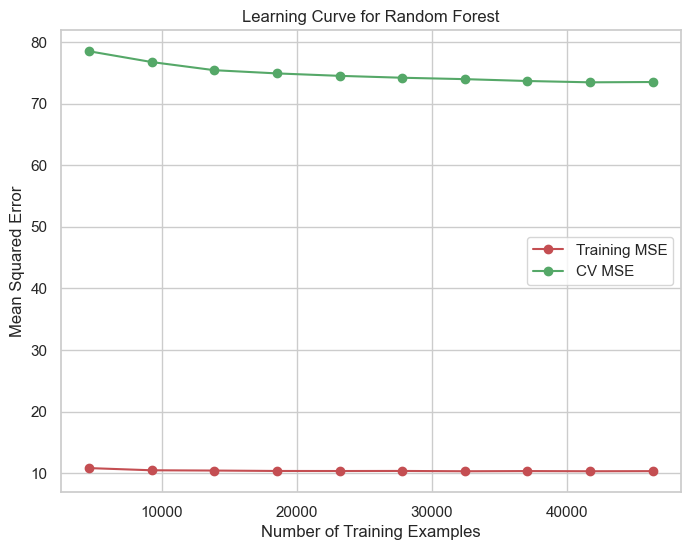

Plotting learning curve for Gradient Boosting...


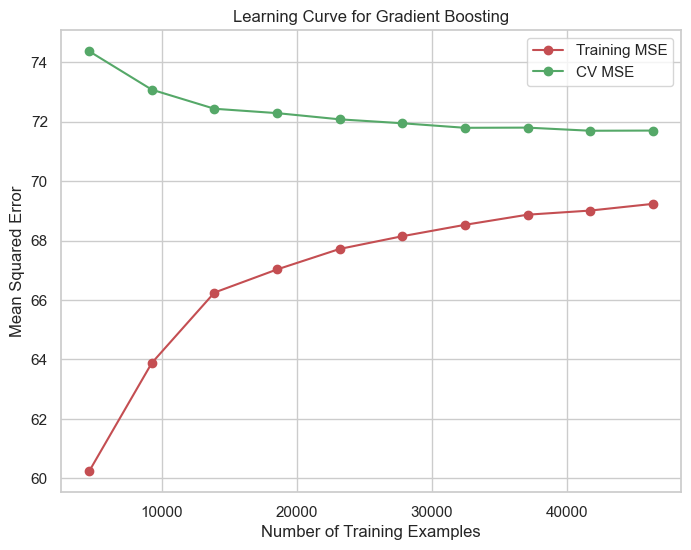

Plotting learning curve for XGBoost...


C:\Users\dipto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, cv, scoring, title):
    """
    Plot learning curve for a given model.

    Parameters:
        model    : The machine learning model (estimator).
        X        : Feature matrix.
        y        : Target vector.
        cv       : Number of cross-validation folds.
        scoring  : Scoring metric (use 'neg_mean_squared_error' for MSE).
        title    : Plot title.
    """
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),  # from 10% to 100% of training data
        n_jobs=-1  # use all processors if possible
    )

    # Since we're using negative MSE, convert scores to positive MSE
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="CV MSE")
    plt.title(title)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}
cv = 5  # 5-fold cross-validation

for name, model in models.items():
    # For Linear Regression, use scaled data; otherwise use raw training data.
    if name == 'Linear Regression':
         X_data = X_train_scaled
    else:
         X_data = X_train

    print(f"Plotting learning curve for {name}...")
    plot_learning_curve(
        model, X_data, y_train,
        cv=cv,
        scoring='neg_mean_squared_error',  # Using negative MSE; learning_curve will return negative values.
        title=f"Learning Curve for {name}"
    )


## Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV: using negative MSE as scoring (to minimize error)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=2,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Retrieve the best model
best_rf = grid_search.best_estimator_

# Evaluate the tuned model on the test set
predictions = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Tuned Random Forest RMSE: {rmse:.3f}")
print(f"Tuned Random Forest R2: {r2:.3f}")


Fitting 2 folds for each of 216 candidates, totalling 432 fits


C:\Users\dipto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dipto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dipto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest RMSE: 9.792
Tuned Random Forest R2: 0.992


# SHAP
### SHAP to generate:
- A force plot (for individual prediction explanation) and 
- A summary bar plot (to show overall feature importance) using the tuned Random Forest model.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dipto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


Force plot saved as 'shap_force_plot.html'.


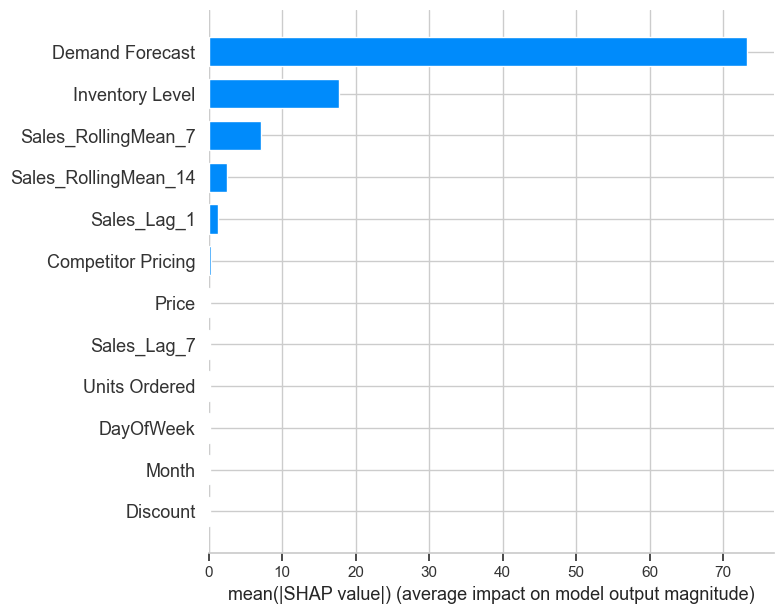

In [ ]:
! pip install shap
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP TreeExplainer with the tuned Random Forest model.
explainer = shap.TreeExplainer(best_rf)

# Optionally, if your test set is large, use a sample of the test data.
# Here, we'll use the first 100 rows.
X_test_sample = X_test.iloc[:100]

# Calculate SHAP values for the sample.
shap_values = explainer.shap_values(X_test_sample)

# -----------------------------------------------
# 1. SHAP Force Plot for a single observation
# -----------------------------------------------
# For an individual prediction, the force plot explains how each feature contributes.
# Here, we show the force plot for the first sample.
shap.initjs()  # Initialize the JS visualization (works best in a Jupyter environment)
force_plot = shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_sample.iloc[0, :])
# In a Jupyter notebook, simply displaying 'force_plot' will render the plot interactively.
# If you are not in a Jupyter environment, you can save it as an HTML file:
shap.save_html("shap_force_plot.html", force_plot)
print("Force plot saved as 'shap_force_plot.html'.")

# -----------------------------------------------
# 2. SHAP Bar Plot (Summary Plot - Bar type)
# -----------------------------------------------
# The summary bar plot gives you an aggregate view of feature importance.
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")
plt.show()


# LIME


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dipto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\dipto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/12.9 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.9 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.9 MB 1.7 MB/s eta 0:00:07
   -----

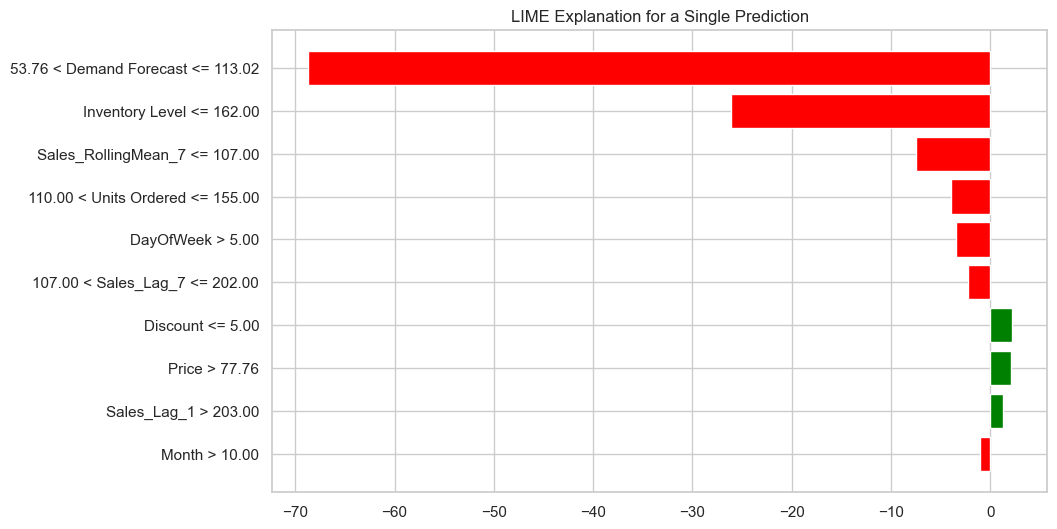

[('53.76 < Demand Forecast <= 113.02', -68.74933287960708), ('Inventory Level <= 162.00', -26.095587081783012), ('Sales_RollingMean_7 <= 107.00', -7.462741573411368), ('110.00 < Units Ordered <= 155.00', -3.9663721243363574), ('DayOfWeek > 5.00', -3.490576213865507), ('107.00 < Sales_Lag_7 <= 202.00', -2.2585152169330835), ('Discount <= 5.00', 2.201169258444789), ('Price > 77.76', 2.081565048178462), ('Sales_Lag_1 > 203.00', 1.249790187672394), ('Month > 10.00', -1.0253638071628044)]


In [ ]:
! pip install lime
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Initialize the LIME Tabular Explainer using training data.
# We pass in X_train as a NumPy array along with the column names.
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression',
    discretize_continuous=True
)

# Select an instance from the test set to explain.
# Here, we use the first observation in X_test.
instance = X_test.iloc[0]

# Generate an explanation for the selected instance.
# The function best_rf.predict is used to get the model's predictions.
# num_features=10 limits the explanation to the top 10 contributing features.
explanation = explainer.explain_instance(instance.values, best_rf.predict, num_features=10)

# Display the explanation in a notebook (if using Jupyter Notebook)
explanation.show_in_notebook(show_table=True)

# Alternatively, generate a matplotlib figure to display the explanation:
fig = explanation.as_pyplot_figure()
plt.title("LIME Explanation for a Single Prediction")
plt.show()

# To print out the explanation details in text form:
print(explanation.as_list())
